## Portfolio Piece 3: Using Histograms to Compare Groups

**Introduction**. During this unit you've learned that we can find meaning in a dataset by visualizing its shape and descriptive statistics. One way to continue the search for meaning in data is by considering separately the groups within a dataset. In this portfolio piece, you will construct histograms that reveal how different parts of a single dataset--*groups*--relate to each other.

**Goal**. Create a single column of subplots (i.e., *small multiples*), each containing a histogram for one group within your data. Make visual comparisons of shape, center, and spread to compare groups. Use this new information to elaborate on the story of your dataset.

1. Import `matplotlib.pyplot` as `plt`, `pandas` as `pd`, and `statistics` as `st`.

In [2]:
#Sample response:
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st

2. From Portfolio Piece 1, copy and paste the code to import your data into the code cell below.

In [3]:
#Sample response:
df = pd.read_csv("https://raw.githubusercontent.com/dmoscoe/HCIS/main/csv/flights_flights.csv")
x = df['air_time']

2. Earlier, you explored the structure of one of the datasets from Portfolio Piece 1. Based on that exploration, how will you group your data? What new questions might we be able to answer by breaking down the data into groups?

*Sample response*: I'll be examining groups in the dataset that measures flight duration for flights departing NYC. By examining the structure of this dataset, I noticed that each flight was associated with one of the three major NYC airports (EWR, JFK, LGA). I will use these airports as my groups. This might help me see whether flight durations vary from airport to airport.

To separate your data into groups, you can assign variables to subsets of the observations. One variable will be assigned to each subset that forms a group.

3. Assign a variable to each group in your data. Use comments to describe the data represented by each variable.

In [7]:
#Sample response:
x_ewr = df[df['origin'] == "EWR"]
x_ewr = x_ewr['air_time']

x_jfk = df[df['origin'] == "JFK"]
x_jfk = x_jfk['air_time']

x_lga = df[df['origin'] == "LGA"]
x_lga = x_lga['air_time']

4. Drop missing values and extreme outliers.

In [8]:
#Sample response:
def tidy(x):
    x = x.dropna()
    x = x[abs(x - st.mean(x)) < 3.5 * st.stdev(x)]
    return x

x_ewr = tidy(x_ewr)
x_jfk = tidy(x_jfk)
x_lga = tidy(x_lga)

5. Print the number of observations in each group. If there are more than 50 observations in each group, then we'll be able to see the shape of the data and make comparisons across groups.

In [9]:
#Sample response:
print(len(x_ewr))
print(len(x_jfk))
print(len(x_lga))

116768
108737
101137


6. Compute descriptive statistics for each group.

In [10]:
#Sample response:
xbar_ewr = st.mean(x_ewr)
xmd_ewr = st.median(x_ewr)
xs_ewr = st.stdev(x_ewr)
xq1_ewr = st.quantiles(x_ewr, n = 4)[0]
xq3_ewr = st.quantiles(x_ewr, n = 4)[2]

xbar_jfk = st.mean(x_jfk)
xmd_jfk = st.median(x_jfk)
xs_jfk = st.stdev(x_jfk)
xq1_jfk = st.quantiles(x_jfk, n = 4)[0]
xq3_jfk = st.quantiles(x_jfk, n = 4)[2]

xbar_lga = st.mean(x_lga)
xmd_lga = st.median(x_lga)
xs_lga = st.stdev(x_lga)
xq1_lga = st.quantiles(x_lga, n = 4)[0]
xq3_lga = st.quantiles(x_lga, n = 4)[2]

**For prompts 7, 8, 10, and 12, add your code to the cell marked "CODE FOR HISTOGRAM SUBPLOTS".**

7. To compare the groups within your data, construct a column of subplots, each of which will contain a histogram for one group. In the call to `plt.subplots()`, set the keyword argument `sharex` to `True` so that we can make visual comparisons of the location of the data within each group. You may wish to experiment with other keyword arguments, like `bins`.

8. Add axis labels and a title to your plots as appropriate.

9. Comment on the shape of the data within each group, or any other interesting features that you notice at this point.

*Sample response*: By breaking the data into groups, I can see that the longest flights originate exclusively from JFK and EWR. I also notice that there's a gap in the distribution for JFK where there is a peak for LGA and EWR. It appears that JFK specializes in very short and very long flights.

10. Based on the shape of the data within each group, as well as the descriptive statistics you calculated above, plot solid vertical lines to show a single measure of center for each group. If it's hard to see these lines, change the transparency of the histograms by setting the keyword argument `alpha` to `0.3` in the call to `axs.hist()`.

11. What measure of center did you choose? Why did you choose it?

*Sample response*: I chose mean as the best measure of center for these distributions. Since I'm especially curious about the effect of very long flights on the typical flight duration from NYC airports, I wanted a measure of center that would be sensitive to these larger values.

12. Choose a single measure of spread to represent about how far from the center we might expect a typical value to be. Add code to plot dashed vertical lines that show the variability of each group.

13. What measure of spread did you choose? Why did you choose it?

*Sample response*: I chose standard deviation as the best measure of spread for these distributions. I knew this measure would be more sensitive to the very long flights, and it might help me detect differences in the variability of the flight durations from the different NYC airports.

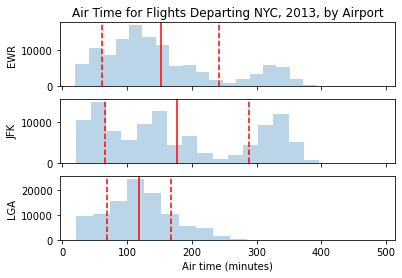

In [13]:
###CODE FOR HISTOGRAM SUBPLOTS###
#Sample response:
fig, axs = plt.subplots(3,1, sharex = True)
axs[0].hist(x_ewr, bins = 20, alpha = 0.3)
axs[1].hist(x_jfk, bins = 20, alpha = 0.3)
axs[2].hist(x_lga, alpha = 0.3)

axs[0].set_title(label = "Air Time for Flights Departing NYC, 2013, by Airport")

axs[0].set_ylabel("EWR")
axs[1].set_ylabel("JFK")
axs[2].set_ylabel("LGA")

axs[2].set_xlabel("Air time (minutes)")

axs[0].axvline(st.mean(x_ewr), color = 'red')
axs[1].axvline(st.mean(x_jfk), color = 'red')
axs[2].axvline(st.mean(x_lga), color = 'red')
axs[0].axvline(st.mean(x_ewr) + st.stdev(x_ewr), color = 'red', linestyle = '--')
axs[1].axvline(st.mean(x_jfk) + st.stdev(x_jfk), color = 'red', linestyle = '--')
axs[2].axvline(st.mean(x_lga) + st.stdev(x_lga), color = 'red', linestyle = '--')
axs[0].axvline(st.mean(x_ewr) - st.stdev(x_ewr), color = 'red', linestyle = '--')
axs[1].axvline(st.mean(x_jfk) - st.stdev(x_jfk), color = 'red', linestyle = '--')
axs[2].axvline(st.mean(x_lga) - st.stdev(x_lga), color = 'red', linestyle = '--')

In Portfolio Pieces 1 and 2, we looked at the center, shape, and spread of the entire dataset. Now we can see how those properties of the whole dataset depend on the properties of groups within it.

14. How do the properties of different groups within your dataset compare? Do you see any clear differences in shape, center, or spread across groups?

*Sample response*: By breaking the distribution into groups, it's clear to see that the kinds of flights departing from the different NYC airports vary. LGA specializes in shorter flights, and flights departing LGA show only a small variability in their duration. In contrast, flights from JFK are, on average, longer. Most striking is the large variability in flight duration for JFK. This is caused by a group of long flights clustered near a secondary peak near the right of the JFK distribution. Flights departing EWR seem to be a mix of short flights, similar to those departing LGA, and longer flights, similar to the long flights departing JFK.

15. How do these differences across groups contribute to our understanding of the data? Did analyzing the data by group help you see something that you didn't see before?

*Sample response*: By breaking the distribution into groups, I was able to see important features of the data that were not detectable when the dataset was visualized as a whole. I can see that LGA specializes in shorter flights. But EWR and JFK have a mix of shorter and longer flights, with JFK having the greatest number of long flights.

16. What else do you notice or wonder about this data or the way that we analyzed it in this unit? What questions about this data are still unanswered? What would you do to investigate these questions?

*Sample response*: I wonder if it would be possible to further group the data by domestic and international flights for flights departing JFK and EWR. I speculate that domestic flights make up the left parts of those distributions, and international flights make up the right peaks. It also seems like LGA may not offer any international flights.